# Program Assignment #4 - Linear Regression & Logistic Regression
---
## Name: 李勝維
## Student ID: 0711239
---

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['text.usetex'] = True

# Linear Regression

# Data Generation

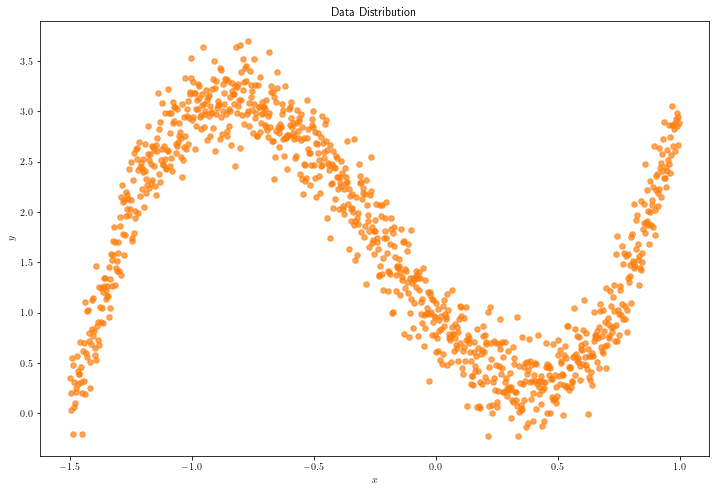

In [81]:
x = np.linspace(-1.5, 1.0, num=1002)[1:-1] # -1.5 < x < 1.0
epsilon = np.random.normal(0, 0.25, size=x.shape)
y = 3*x**3 + 2*x**2 - 3*x + 1 + epsilon

# plot
plt.figure()
plt.title("Data Distribution")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.scatter(x, y, s=30, alpha=0.7, c='tab:orange')
plt.show()

# Data Preprocessing

In [82]:
from sklearn.preprocessing import PolynomialFeatures as PF
poly_features = list()
for k in range(1, 5):
    poly = PF(k)
    tmp_x = poly.fit_transform(x[..., None])
    poly_features.append(tmp_x)

# Model Construction

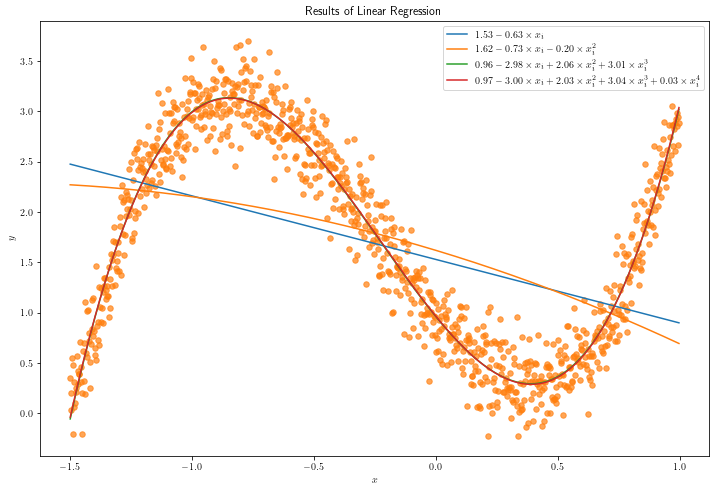

In [83]:
from sklearn.linear_model import LinearRegression

weights = list()
models = list()
for k, poly_x in enumerate(poly_features):
    lr_model = LinearRegression(fit_intercept=False, n_jobs=-1)
    f = lr_model.fit(poly_x, y)
    tmp = list(f.coef_)
    for i in range(len(tmp)):
        if tmp[i] < 0:
            tmp[i] = f'- {abs(tmp[i]):.2f}'
        else:
            if i != 0:
                tmp[i] = f'+ {tmp[i]:.2f}'
            else:
                tmp[i] = f'{tmp[i]:.2f}'
    weights.append(tmp)
    models.append(f)
# weights[k-1] = coef of fitted function (increasing degree) from poly_features of degree k
plt.figure()
plt.title("Results of Linear Regression")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.scatter(x, y, s=30, alpha=0.7, c='tab:orange')
for poly_x, model in zip(poly_features, models):
    y_hat = model.predict(poly_x)
    plt.plot(x, y_hat)

legends = ['${}{} \\times x_i$'.format(*weights[0]),
           '${}{} \\times x_i {} \\times x^2_i$'.format(*weights[1]),
           '${}{} \\times x_i {} \\times x^2_i {} \\times x^3_i$'.format(*weights[2]),
           '${}{} \\times x_i {} \\times x^2_i {} \\times x^3_i {} \\times x^4_i$'.format(*weights[3]),
]
plt.legend(legends)
plt.show()

# Logistic Regression

In [84]:
# initialization
from matplotlib.colors import ListedColormap
plt.rcParams["figure.figsize"] = (10,9)
# release memory
del x
del y

# Data Generation

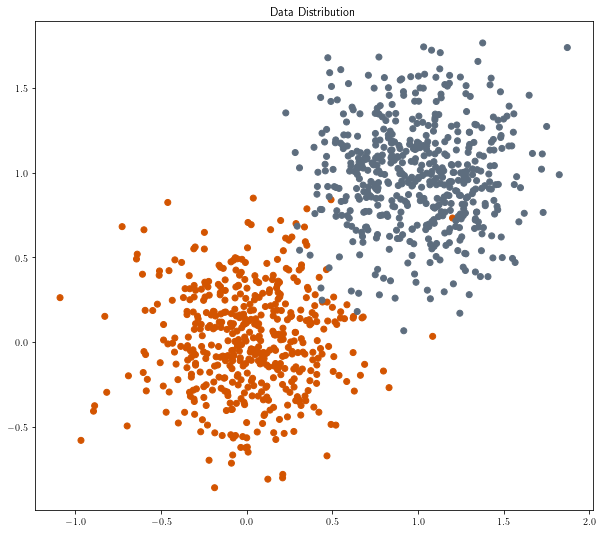

In [85]:
X0 = list()
X1 = list()
for _ in range(1000):
    yi = np.random.randint(0, 2)
    xi = np.random.multivariate_normal([yi, yi], [[0.1, 0], [0, 0.1]])
    if yi == 1:
        X1.append(xi)
    else:
        X0.append(xi)
X = np.vstack((X0, X1))
Y = np.hstack((np.zeros(len(X0)), np.ones((len(X1)))))

plt.figure()
plt.title("Data Distribution")
cmap_light = ListedColormap(['#F6DDCC','#D5D8DC'])
cmap_bold = ListedColormap(['#D35400', '#5D6D7E'])
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold)
plt.show()

# Model Construction

In [86]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=0, fit_intercept=True, n_jobs=-1)
lr_model.fit(X, Y)

LogisticRegression(n_jobs=-1, random_state=0)

# Results

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

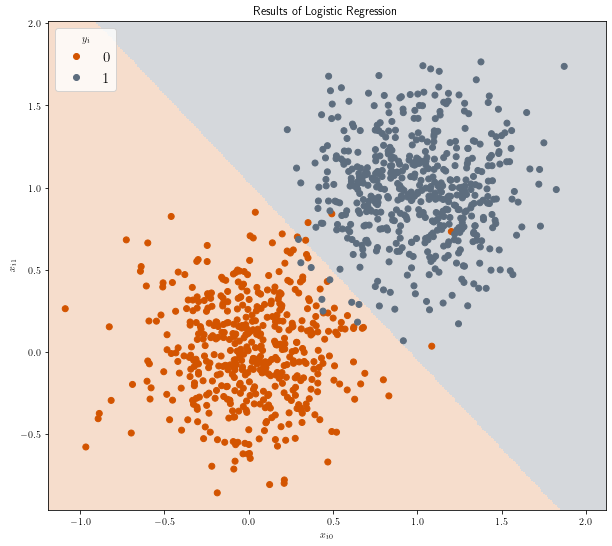

In [87]:
from IPython.display import display, Latex
display(Latex(f"$Model\  Accuracy = {lr_model.score(X, Y):.3f}$"))
display(Latex(f'$y_i = L({lr_model.intercept_[0]:.2f}+ {lr_model.coef_[0, 0]:.2f} \\times x_{{i0}}+ {lr_model.coef_[0, 1]:.2f} \\times x_{{i1}})$'))

# plot decision boundry
h = 0.01 # block size of mesh
spacing = 0.25
spacing_left = 0.1
x_min, x_max = X[..., 0].min()-spacing_left, X[..., 0].max()+spacing
y_min, y_max = X[..., 1].min()-spacing_left, X[..., 1].max()+spacing
mesh_x, mesh_y = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
in_ = np.column_stack((mesh_x.reshape(-1), mesh_y.reshape(-1)))
Z = lr_model.predict(in_)

Z = Z.reshape(mesh_x.shape)
fig, ax = plt.subplots()
ax.pcolormesh(mesh_x, mesh_y, Z, shading='auto', cmap=cmap_light)
scatter = ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold)
plt.xlabel(r"$x_{i0}$")
plt.ylabel(r"$x_{i1}$")
plt.title("Results of Logistic Regression")
legend = ax.legend(*scatter.legend_elements(), title="$y_i$", prop={'size': 15})
plt.show()